In [1]:
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np

style.use('ggplot')

In [2]:
class K_Means:
    
    def __init__(self, k = 2, tolerance = 0.01, max_iter = 300):
        self.k = k
        self.tolerance = tolerance
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.clustering = {}
            
            for i in range(self.k):
                self.clustering[i] = []
                
            for feature_set in data:
                distances = [np.linalg.norm(feature_set - self.centroids[centroid]) for centroid in self.centroids]
                cluster = distances.index(min(distances))

                self.clustering[cluster].append(feature_set)
            
            prev_centroids = dict(self.centroids)
            
            for cluster in self.clustering: 
                self.centroids[cluster] = np.average(self.clustering[cluster], axis = 0)  
            
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tolerance:
                    print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0))
                    optimized = False
            
            if optimized:
                break
            
    def predict(self, data):
        distances = [np.linalg.norm(feature_set - self.centroids[centroid]) for centroid in self.centroids]
        cluster = distances.index(min(distances))
        
        return cluster

In [3]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

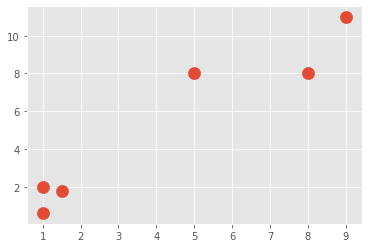

In [4]:
plt.scatter(X[:, 0], X[:, 1], s = 150)

plt.show()

In [5]:
colors = ['g', 'r', 'b', 'k']

In [6]:
k_means = K_Means()

In [7]:
k_means.fit(X)

453.3333333333334
102.72108843537411


In [8]:
unknown_data = np.array([[1, 3], [8, 9], [0, 3], [5, 4], [6, 4]])

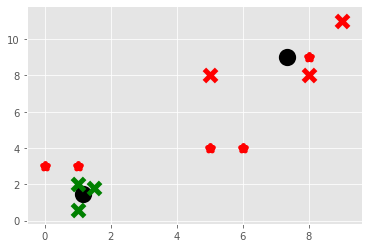

In [9]:
for centroid in k_means.centroids:
    plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], marker = 'o', color = 'k', s = 150, linewidth = 5)
    
for cluster in k_means.clustering:
    color = colors[cluster]
    
    for feature_set in k_means.clustering[cluster]:
        plt.scatter(feature_set[0], feature_set[1], marker = 'x', color = color, s = 150, linewidth = 5)

for data_test in unknown_data:
    cluster = k_means.predict(data_test)
    
    plt.scatter(data_test[0], data_test[1], marker = '*', color = colors[cluster], linewidth = 5)
    
plt.show()